In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from scipy import stats
import random

Goal percentage = 2.76 %


Text(0.5, 1.0, 'Intubated patients')

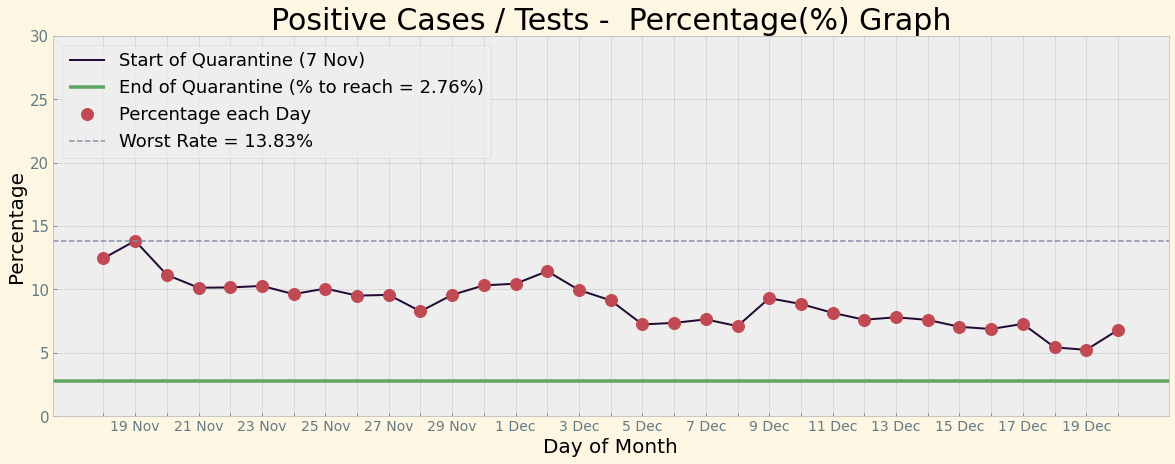

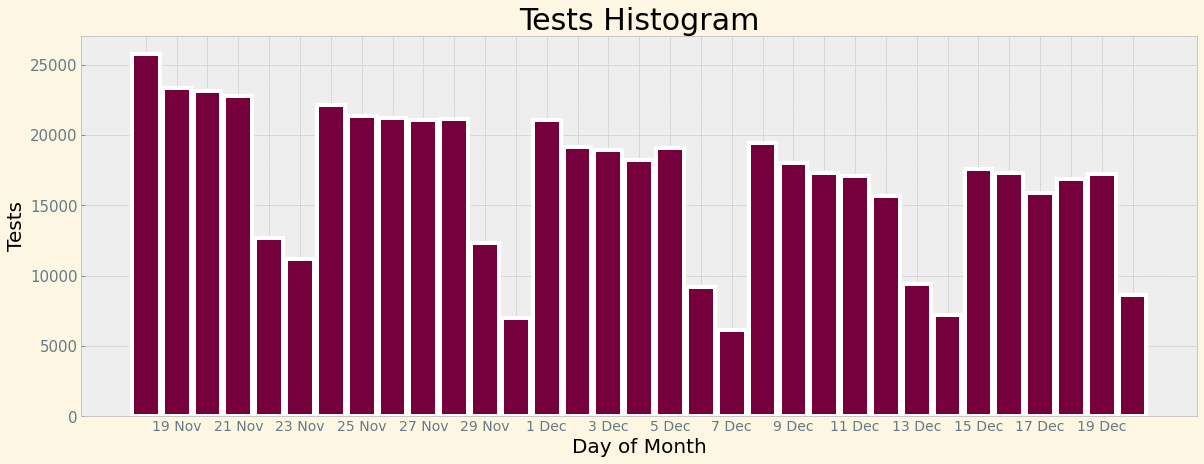

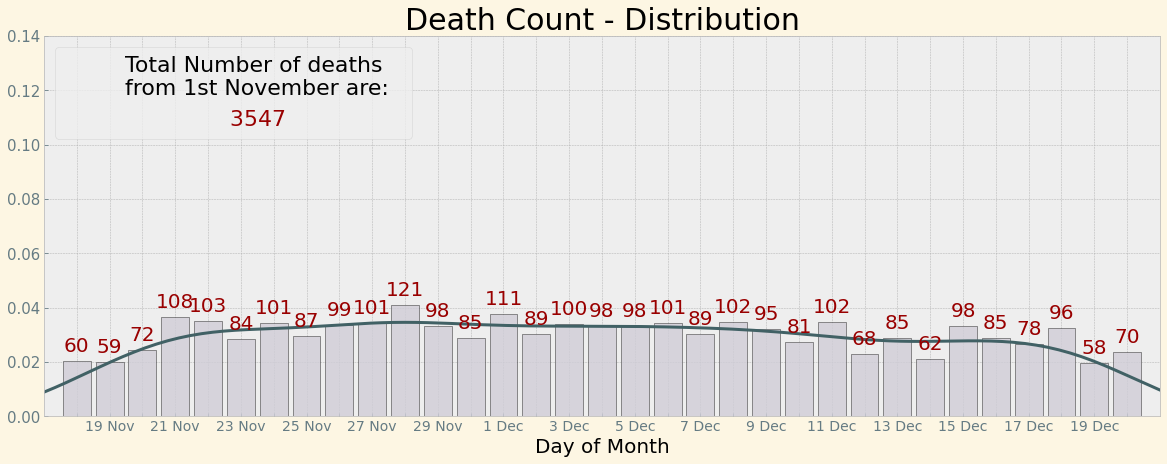

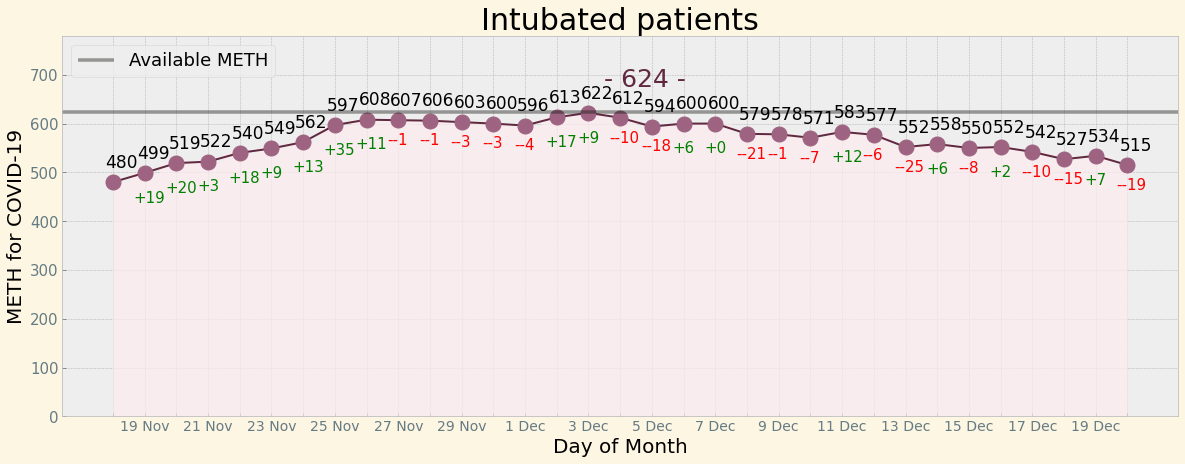

In [2]:
tests = [14698, 11986, 25075, 24204, 23176, 25987, 24086, 15112, 10687, 25217,
         25714, 24922, 24970, 24896, 14262, 11911, 23954, 25765, 23325, 23148,
         22798, 12698, 11209, 22166, 21361, 21211, 21061, 21112, 12320, 7023,
         21032, 19112, 18904, 18241, 19092, 9214, 6105, 19438, 18014, 17326,
         17101, 15683, 9432, 7178, 17577, 17290, 15853, 16849, 17200, 8639]
cases = [1678, 1152, 2166, 2646, 2917, 2448, 2556, 1914, 1490, 2384,
         2752, 3316, 3038, 2835, 1698, 2198, 2422, 3209, 3227, 2581,
         2311, 1498, 1388, 2135, 2152, 2018, 2016, 1747, 1193, 1044,
         2199, 2186, 1882, 1667, 1383, 904, 1251, 1382, 1677, 1534,
         1395, 1194, 693, 639, 1240, 1190, 1155, 916, 901, 588]
hospitalizations = [140, 153, 169, 179, 187, 196, 207, 228, 239, 263,
                    297, 310, 336, 366, 392, 400, 443, 480, 499, 519,
                    522, 540, 549, 562, 597, 608, 607, 606, 603, 600,
                    596, 613, 622, 612, 594, 600, 600, 579, 578, 571,
                    583, 577, 552, 558, 550, 552, 542, 527, 534, 515]
deaths = [9, 7, 13, 18, 29, 14, 34, 35, 41, 41,
          43, 50, 38, 38, 71, 59, 63, 60, 59, 72,
          108, 103, 84, 101, 87, 99, 101, 121, 98, 85,
          111, 89, 100, 98, 98, 101, 89, 102, 95, 81,
          102, 68, 85, 62, 98, 85, 78, 96, 58, 70]


days = ['1 Nov', '', '3 Nov', '', '5 Nov', '', '7 Nov', '', '9 Nov', '',
        '11 Nov', '', '13 Nov', '', '15 Nov', '', '17 Nov', '', '19 Nov', '',
        '21 Nov', '', '23 Nov', '', '25 Nov', '', '27 Nov', '', '29 Nov', '',
        '1 Dec', '', '3 Dec', '', '5 Dec', '', '7 Dec', '', '9 Dec', '',
        '11 Dec', '', '13 Dec', '', '15 Dec', '', '17 Dec', '', '19 Dec', '',
        '21 Dec', '', '23 Dec', '', '25 Dec', '', '27 Dec', '', '29 Dec', '', '31 Dec']

start_date = 17
adjust_weekends = True

percentage = []
for day in range(len(cases)):
    percentage.append((cases[day]/tests[day])*100)

## Saturdays & Sundays
# Takes the mean percentages + a random value between 0.1 and 0.5 and modifies these 2 days
# It tries to create a more natural and accurate illustration for the plots, since Tests are
# very few to generalize for these two days of the week and do not depict a helpful figure.
if adjust_weekends:
    i = 0
    while i < (len(tests)-2):
        if (i % 7 == 0):
            percentage[i] = (percentage[i-1] + percentage[i+2]) / 2 + random.uniform(0.1, 0.5)
            i += 1
            percentage[i] = (percentage[i-1] + percentage[i+1]) / 2 + random.uniform(0.1, 0.5)
        i += 1
    
avg_tests = np.ceil(sum(tests)/ len(cases))
predefined_goal = 500
goal_percentage = round(predefined_goal / avg_tests, 4)*100
print('Goal percentage =', goal_percentage, '%')

# print(plt.style.available)
plt.style.use('Solarize_Light2')
plt.style.use('bmh')

# 1. Positive Test / Cases
plt.figure(figsize=(20, 7))
plt.plot(percentage[start_date:], label='Start of Quarantine (7 Nov)', color='#230C33')
plt.axhline(y=goal_percentage, label='End of Quarantine (% to reach = '+ str(goal_percentage) +'%)',
            color='#60A561', linestyle='-', linewidth= 3.5)
plt.plot(percentage[start_date:], 'o', label='Percentage each Day', color='#C14953', markersize=12)
if start_date <= 6:
    plt.axvline(x=6-start_date, color='#330000', linestyle='-', linewidth= 3)
plt.ylim(0, 30)
plt.xticks(np.arange(len(cases[start_date:])), days[start_date:len(cases)], fontsize= 14)
plt.axhline(y=max(percentage), label='Worst Rate = ' + str(round(max(percentage), 2))+'%',
            color='#848FA5', linestyle='--', linewidth= 1.5)
plt.yticks(fontsize= 15)
plt.legend(loc='upper left', fontsize='18')
plt.ylabel('Percentage', color="black", fontsize=20, ha='center')
plt.xlabel('Day of Month', color="black", fontsize=20, ha='center')
plt.title('Positive Cases / Tests -  Percentage(%) Graph', color="black", fontsize=30, ha='center')


# 2. Tests Histogram
hist_values=[]
for i in range(len(tests[start_date:])):
    for value in range(tests[i+start_date]):
        hist_values.append(i)

plt.figure(figsize=(20, 7))
plt.hist(hist_values, bins=np.arange(len(tests[start_date:])+1)-0.5, rwidth=0.9, 
         color='#76003B', ec='#FFF', lw=4)
plt.xticks(np.arange(len(cases[start_date:])), days[start_date:len(cases)], fontsize= 14)
plt.yticks(fontsize= 15)
plt.ylabel('Tests', color="black", fontsize=20, ha='center')
plt.xlabel('Day of Month', color="black", fontsize=20, ha='center')
plt.title('Tests Histogram', color="black", fontsize=30, ha='center')


# 3. Deaths Plot
hist_deaths=[]
for i in range(len(tests[start_date:])):
    for value in range(deaths[i+start_date]):
        hist_deaths.append(i)

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
sn.distplot(hist_deaths, bins=np.arange(len(tests[start_date:])+1)-0.5, 
            kde_kws={'color':'#416165', 'linewidth':3},  color='#D0CDD7',
            hist_kws={"rwidth":0.85,'edgecolor':'black', 'alpha':0.8})

##Counts for histograms
s = 0
counter = 0
for p in ax.patches:
    s+= p.get_height()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height()+0.002,
            '{}'.format(deaths[start_date+counter]), 
            fontsize=20,
            color='#990000',
            ha='center',
            va='bottom')
    counter +=1

plt.xticks(np.arange(len(cases[start_date:])), days[start_date:len(cases)], fontsize= 14)
plt.xlim(-1, len(tests[start_date:]))
plt.ylim(0, 0.14)
plt.yticks(fontsize= 15)
plt.xlabel('Day of Month', color="black", fontsize=20, ha='center')
ax.set_title('Death Count - Distribution', fontsize=30)

total_deaths = 0
for i in range(len(tests)):
    total_deaths += deaths[i]

plt.plot([], [], ' ', label="Total Number of deaths \nfrom 1st November are:  ", color="#000")
plt.plot([], [], ' ', label=" "*15 +str(total_deaths), color='#990000')
legend = plt.legend(loc='upper left', fontsize='22')
for line, text in zip(legend.get_lines(), legend.get_texts()):
    text.set_color(line.get_color())

# 4. Hospitalizations
hist_hospitalizations=[]
for i in range(len(tests[start_date:])):
    for value in range(deaths[i+start_date]):
        hist_hospitalizations.append(i)

fig2= plt.figure(figsize=(20, 7))
ax2 = fig2.add_subplot(111)

x = range(len(tests[start_date:]))
y = hospitalizations[start_date:]
plt.fill_between(x,y,y2=0, step="mid", alpha=0.7, color='#FDECEF')

plt.plot(hospitalizations[start_date:], color="#612940")
plt.plot(hospitalizations[start_date:], 'o', color="#9D6381", markersize=15)
plt.axhline(y=624, label='Available METH',
            color='#0F110C', linestyle='-', linewidth= 3.5, alpha=0.4)
plt.text(np.floor(len(tests[start_date:])/2)-0.5, 675,'- 624 -', fontsize=25, color='#612940')


for i in range(len(hospitalizations[start_date:])):
    plt.text(i-0.25, hospitalizations[i+start_date]+30, 
             str(hospitalizations[i+start_date]), fontsize=17)
    
for i in range(len(hospitalizations[start_date:])-1):
    new_hospitalizations = hospitalizations[i+1+start_date] - hospitalizations[i+start_date]
    if new_hospitalizations >= 0:
        plt.text(i+1 -0.35, hospitalizations[i+1+start_date]-60, "+" + str(new_hospitalizations),
                 fontsize=15,color='green')
    else:
        plt.text(i+1 -0.35, hospitalizations[i+1+start_date]-50, "-" + str(new_hospitalizations),
                 fontsize=15, color='red')
        
plt.ylim(0,780)
plt.yticks(fontsize= 15)
plt.xticks(np.arange(len(cases[start_date:])), days[start_date:len(cases)], fontsize= 14)
plt.legend(loc='upper left', fontsize='18')
plt.ylabel('METH for COVID-19', color="black", fontsize=20, ha='center')
plt.xlabel('Day of Month', color="black", fontsize=20, ha='center')
plt.title('Intubated patients', color="black", fontsize=30, ha='center')